# Image Preprocessing
https://www.mdpi.com/1424-8220/23/12/5589


# 1. Portralt Generation Module

1.1 Input Image

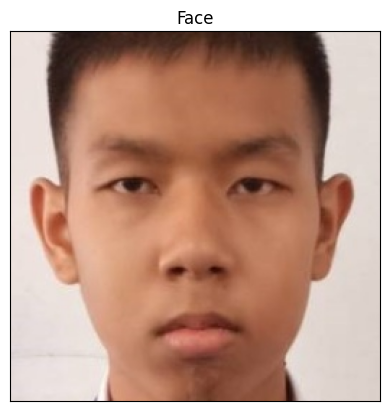

In [173]:
import cv2
from IPython.display import Image
from matplotlib import pyplot as plt
# monet2photo
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.utils import img_to_array
from keras.preprocessing.image import load_img
# Read the input image 

path = 'F:\\FRA503_IOT\\Portrait_Datasets\\'
list_dir = listdir(path)

for i in range (0,len(list_dir)):
    img = cv2.imread(path + list_dir[i])
    
    # Convert into grayscale 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load the cascade 
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')  

    # Detect faces 
    faces = face_cascade.detectMultiScale(gray, 1.1, 4) 
    # Draw rectangle around the faces and crop the faces 
    for (x, y, w, h) in faces: 
        # cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2) 
        faces = img[y-20:y + h +20, x-20:x + w +20] 

    resized_image = cv2.resize(faces, (256, 256))
    cv2.imwrite('F:\\FRA503_IOT\\Preprocess_Datasets\\face_%s.jpg' % (str(i)), resized_image) 
 

def show_rgb_image(image, title=None, conversion = cv2.COLOR_BGR2RGB):

    # Converts from one colour space to the other. this is needed as RGB
    # is not the default colour space for OpenCV
    image = cv2.cvtColor(image, conversion)

    # Show the image
    plt.imshow(image)

    # remove the axis / ticks for a clean looking image
    plt.xticks([])
    plt.yticks([])

    # if a title is provided, show it
    if title is not None:
        plt.title(title)

    plt.show()

faces = cv2.imread('face.jpg')
show_rgb_image(faces, 'Face', cv2.COLOR_BGR2RGB)

1.2 Portralt Image Target Style

In [182]:
import cv2
from IPython.display import Image
from matplotlib import pyplot as plt
# monet2photo
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.utils import img_to_array
from keras.preprocessing.image import load_img

# Read the input image 

path = 'F:\\FRA503_IOT\\Portrait_Drawing_Datasets\\'
list_dir = listdir(path)
for i in range (0,len(list_dir)):
    img = cv2.imread(path + list_dir[i])

    # Convert into grayscale 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray, (256, 256))
    cv2.imwrite('F:\\FRA503_IOT\\Preprocess_Portrait_Dataset\\Draw_%s.jpg' % (str(i)), resized_image) 

In [176]:
list_dir

['0d695c2dd99b192e832c6092308a74d7.jpg',
 '1003113_641929975835599_355050672_n.jpg',
 '1004043_641929279169002_717353526_n.jpg',
 '1010507_641929282502335_116542188_n.jpg',
 '1014072_641930262502237_1136495787_n.jpg',
 '1016102_641929275835669_1266991501_n.jpg',
 '10166_641930015835595_1530587921_n.jpg',
 '18edf53aacdf172afc9fbc314a1880b3.jpg',
 '20fed74a49f14ac07435aa34fcb08313.jpg',
 '274578597_5468307683197780_3155217206996785015_n.jpg',
 '285315_577807325581198_1946654216_n.jpg',
 '2af2f8c7b73c7e28b6015ee074afdb38.jpg',
 '2b9b5512030abad333a72e0795139dca.jpg',
 '306788758_452332946916388_6181485121879730210_n.jpg',
 '306959126_451661120316904_6719254554637093947_n.jpg',
 '395623_577806402247957_215202302_n.jpg',
 '395643_577806352247962_1150401725_n.jpg',
 '3ae2fd3ea519248d927aad295b841de9.jpg',
 '522013_577811772247420_1947977720_n.jpg',
 '542800_577811255580805_617117297_n.jpg',
 '579657_577806628914601_1837674183_n.jpg',
 '606038c326ec612a130ef19b2723e413.jpg',
 '8703_6419300125

# 2. Sketch Generation Module

turn image to grey and modify the image by sharpening the edges

In [174]:
import cv2
image = cv2.imread('face.jpg')  # loads an image from the specified file
# convert an image from one color space to another
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
invert = cv2.bitwise_not(grey_img)  # helps in masking of the image
# sharp edges in images are smoothed while minimizing too much blurring
blur = cv2.GaussianBlur(invert, (25, 25), 0)
invertedblur = cv2.bitwise_not(blur)
sketch = cv2.divide(grey_img, invertedblur, scale=256.0)
cv2.imwrite("sketch.png", sketch)  # converted image is saved as mentioned name
cv2.imshow('Sketch pic', sketch)
cv2.waitKey(0)        
 
# # Destroying present windows on screen
cv2.destroyAllWindows() 


Load Model

Loaded dataA:  (48, 256, 256, 3)
Loaded dataB:  (36, 256, 256, 3)
1/1 [==============================] - 2s 2s/step


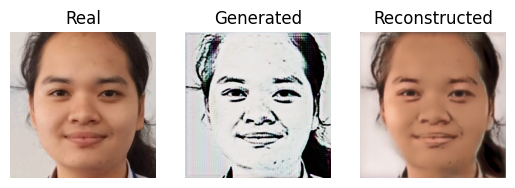

In [111]:
import cv2
from IPython.display import Image
from matplotlib import pyplot as plt
import matplotlib.image
# monet2photo
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.utils import img_to_array
from keras.preprocessing.image import load_img
from sklearn.utils import resample
from instancenormalization import InstanceNormalization
from PIL import Image
# Read the input image 

# Use the saved cyclegan models for image translation
from keras.models import load_model
from matplotlib import pyplot
from numpy.random import randint

# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	return X

# plot the image, its translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	# cv2.imwrite("Generate_Portrait.png", imagesY1)
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])

		matplotlib.image.imsave('Genearated_Portrait.png', images[1])
		# title
		pyplot.title(titles[i])
	pyplot.show()

def load_images(path, size=(256,256)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)


dataA_all = load_images('F:\\FRA503_IOT\\Preprocess_Portrait_Dataset\\')
print('Loaded dataA: ', dataA_all.shape)

dataB_all = load_images('F:\\FRA503_IOT\\Preprocess_Datasets\\')
print('Loaded dataB: ', dataB_all.shape)

# load dataset
A_data = resample(dataA_all, 
                 replace=True,     
                 n_samples=50,    
                 random_state=42) # reproducible results

B_data = resample(dataB_all, 
                 replace=True,     
                 n_samples=50,    
                 random_state=42) # reproducible results



A_data = (A_data - 127.5) / 127.5
B_data = (B_data - 127.5) / 127.5


# load the models
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('g_model_AtoB_002200.h5', cust)
model_BtoA = load_model('g_model_BtoA_002200.h5', cust)

# plot A->B->A (Drawing to Portrait to Drawing)

# A_real = select_sample(A_data, 1)
# B_generated  = model_AtoB.predict(A_real)
# A_reconstructed = model_BtoA.predict(B_generated)
# show_plot(A_real, B_generated, A_reconstructed)

# plot B->A->B (Portrait to Drawing to Portrait)

B_real = select_sample(B_data, 1)
A_generated  = model_BtoA.predict(B_real)
B_reconstructed = model_AtoB.predict(A_generated)
show_plot(B_real, A_generated, B_reconstructed)

# 3. Drawing Motion Generation Module

3.1 Skeleton Extraction

(<Axes: title={'center': 'Erosion Image'}>,
 Text(0.5, 1.0, 'Erosion Image'))

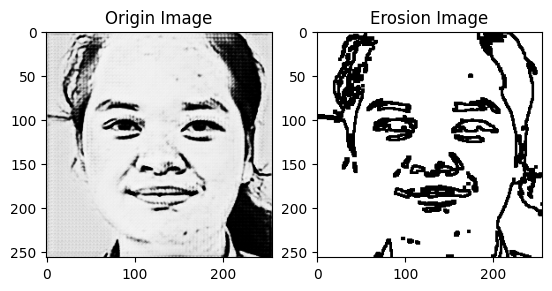

In [112]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
img = cv2.imread("Genearated_Portrait.png",0)


# binarize the image 
binr = cv2.threshold(img, 0, 255, 
                     cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 

  
# define the kernel 
kernel = np.ones((4,4), np.uint8)

erosion = cv2.erode(binr,kernel,iterations=1) 

gradient = cv2.morphologyEx(binr, cv2.MORPH_GRADIENT ,kernel)
  
# opening the image 
opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN, 
                           kernel, iterations=1) 

# opening the image 
open_n_closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1) 



# print the output 
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Origin Image')
plt.subplot(122),plt.imshow(255-gradient, cmap='gray'),plt.title('Erosion Image')
